In [1]:
!pip install tensorflow scikit-learn

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv("/content/boston.csv")

In [5]:
# Separate features and target
X = data.drop("MEDV", axis=1)  # medv = median value of home (target)
y = data["MEDV"]

In [6]:
# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[X.shape[1]]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [18]:
# Train
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.9071 - mae: 2.1821 
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.1256 - mae: 2.2573 
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.2253 - mae: 2.0731 
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.9766 - mae: 2.2490 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.7474 - mae: 2.0557 
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.9266 - mae: 2.0328 
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.1667 - mae: 2.1233 
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.8711 - mae: 2.1507 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.6028 - mae: 2.2416 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.9172 - mae: 2.1073 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.9735 - mae: 2.0912 
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.9373 - mae: 2.0904 
Epoch 13/100
13/13 ━━━━━━

In [19]:
# Evaluate
loss, mae = model.evaluate(X_test, y_test)
print(f"\nTest MAE: {mae:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.6511 - mae: 2.0293 

Test MAE: 2.15


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


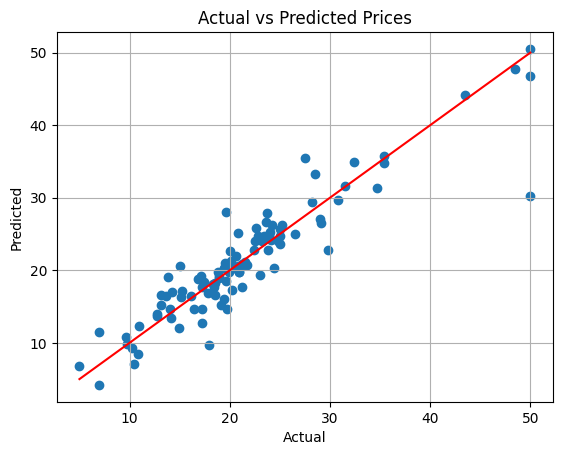

In [20]:
# Predict and plot
y_pred = model.predict(X_test).flatten()
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()